In [73]:
# 필요한 라이브러리
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [55]:
tree = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\tree.csv")
house = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\house.csv")
man = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\man.csv")
woman = pd.read_csv(r"C:\Users\user\Desktop\23_kdt_hackathon\hackathon_data\woman.csv")

In [57]:
drop_cols = "Unnamed: 0"
tree = tree.drop(drop_cols, axis=1)
man = man.drop(drop_cols, axis=1)
woman = woman.drop(drop_cols, axis=1)
house = house.drop(drop_cols, axis=1)

In [59]:
# house에서 지붕, 문, 사이즈 비교
house['roof_size'] = house['roof_h']*house['roof_w']

house['door_size'] = house['door_h']*house['door_w']

house['window_size'] = house['window_h']*house['window_w']

#### dict 만들어서, 이상치 제거한 값의 평균들을 다 저장.

In [175]:
mean=dict()

#### 박스 플롯 함수

In [179]:
def box_plot(data, name, col):
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data, x=data[col])

    np_arr = np.array(data[col])
    
    q1 = np.percentile(np_arr, 25)
    q3 = np.percentile(np_arr, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [x for x in data[col] if x < lower_bound or x > upper_bound]
    
    inliners = [x for x in data[col] if x >= lower_bound and x <= upper_bound]
    inliners = np.array(inliners)
    
    if name=='man':
        cols = col+'_man'
        mean[cols] = inliners.mean()
    elif name=='woman':
        cols = col+'_woman'
        mean[cols] = inliners.mean()
    else:
        mean[col] = inliners.mean()
    
    
    print("이상치 개수:", len(outliers))
    print('이상치 제거한 데이터의 평균값:', inliners.mean())
    print('본래 데이터의 평균값:', data[col].mean())

-----------------------
## 집 통계량

-----------------------

### 지붕 넓이 통계량

이상치 개수: 450
이상치 제거한 데이터의 평균값: 133210.2868202765
본래 데이터의 평균값: 145784.32053097346


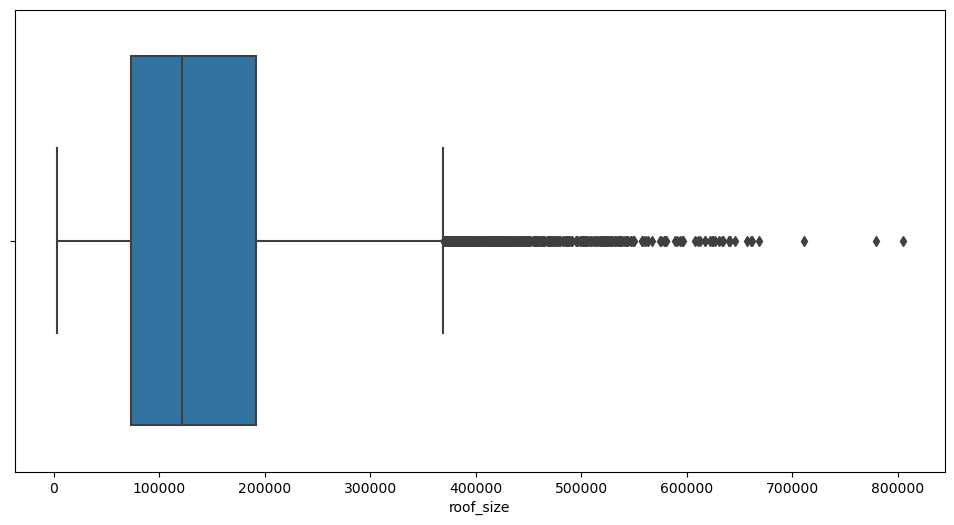

In [180]:
box_plot(house, 'house', 'roof_size')

### 문 넓이 통계량

이상치 개수: 601
이상치 제거한 데이터의 평균값: 21853.83830264511
본래 데이터의 평균값: 25831.28946902655


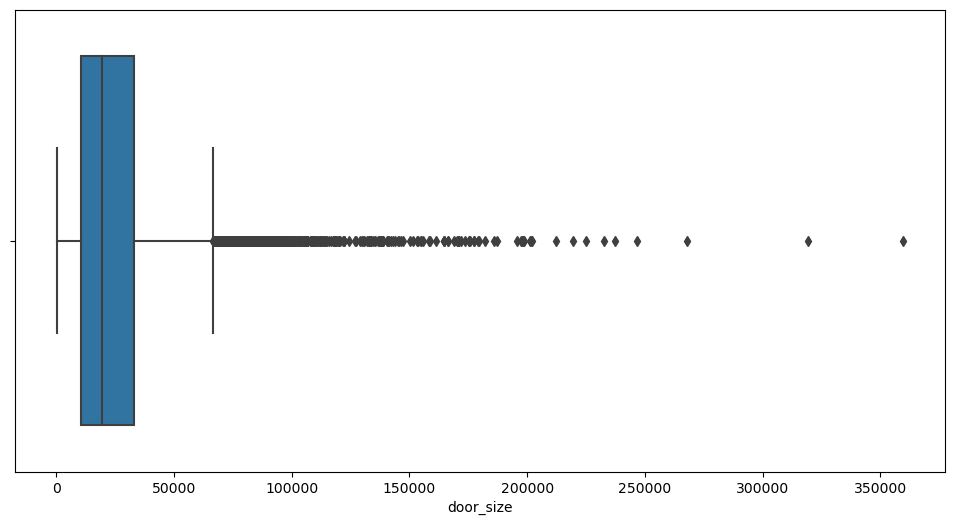

In [181]:
box_plot(house, 'house', 'door_size')

### 창문 넓이 통계량

이상치 개수: 708
이상치 제거한 데이터의 평균값: 9998.695902567975
본래 데이터의 평균값: 12653.591327433629


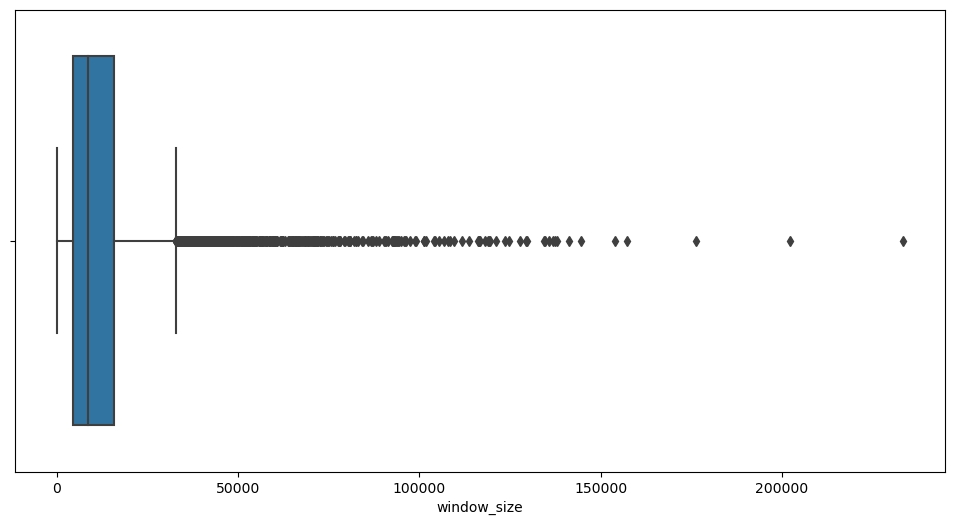

In [182]:
box_plot(house, 'house', 'window_size')

In [128]:
house.describe()

,roof_h,roof_w,door_h,door_w,window_h,window_w,roof_size,door_size,window_size
count,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000
mean,269.661593,496.701239,182.296372,122.530265,99.568142,106.050619,145784.320531,25831.289469,12653.591327
std,106.334813,196.249423,80.246378,56.949322,46.212147,59.952949,101139.746846,23553.423985,13900.813877
min,23.000000,51.000000,22.000000,16.000000,13.000000,9.000000,3159.000000,400.000000,117.000000
25%,192.000000,356.000000,126.000000,82.000000,67.000000,66.000000,73006.000000,10659.500000,4556.000000
50%,257.000000,474.500000,170.000000,113.000000,92.000000,93.000000,121758.000000,19320.000000,8624.000000
75%,334.000000,614.000000,224.000000,151.000000,122.000000,131.000000,191538.750000,33068.250000,15876.000000
max,764.000000,1280.000000,729.000000,1092.000000,454.000000,676.000000,804784.000000,359397.000000,233250.000000


In [184]:
## 얼굴과 눈, 귀, 코의 사이즈가 비교되어야 함으로...

man['face_size'] = man.face_h * man.face_w
man['ear_size'] = man.ear_h * man.ear_w
man['eye_size'] = man.eye_h * man.eye_w
man['nose_size'] = man.nose_h * man.nose_w
man['body_size'] = man.body_h * man.body_w
man['neck_size'] = man.neck_h * man.neck_w

woman['face_size'] = woman.face_h * woman.face_w
woman['ear_size'] = woman.ear_h * woman.ear_w
woman['eye_size'] = woman.eye_h * woman.eye_w
woman['nose_size'] = woman.nose_h * woman.nose_w
woman['body_size'] = woman.body_h * woman.body_w
woman['neck_size'] = woman.neck_h * woman.neck_w

-----------------------
## 남자 통계량

-----------------------

### 눈 넓이 통계량 - 남자

이상치 개수: 827
이상치 제거한 데이터의 평균값: 1278.108840258363
본래 데이터의 평균값: 1769.6557142857143


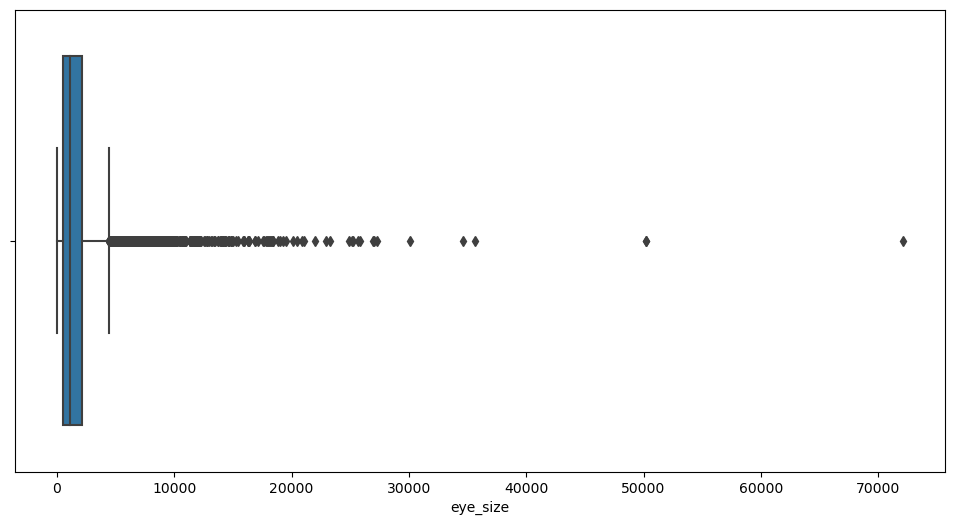

In [185]:
box_plot(man, 'man', 'eye_size')

### 얼굴 넓이 통계량 - 남자

이상치 개수: 726
이상치 제거한 데이터의 평균값: 42139.88514416651
본래 데이터의 평균값: 51365.712857142855


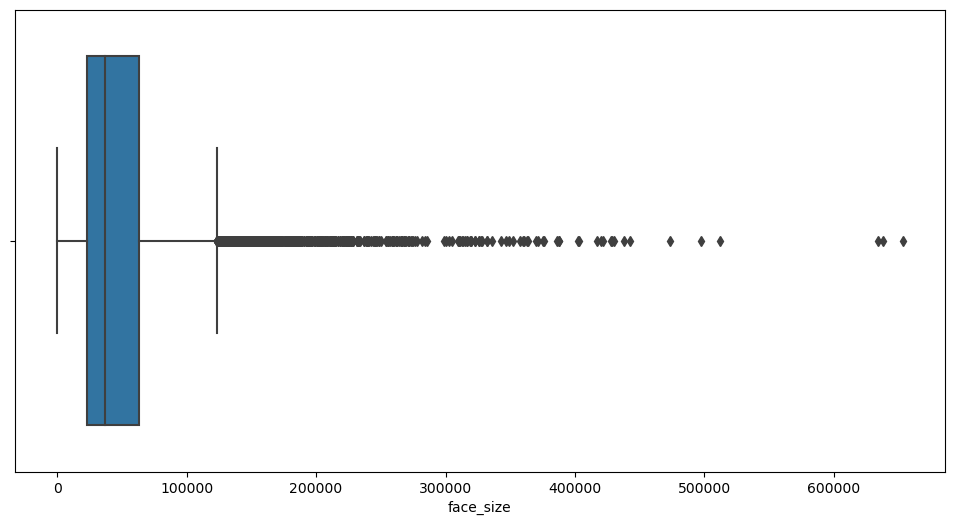

In [186]:
box_plot(man, 'man', 'face_size')

### 코 통계량 - 남자

#### 코 넓이 통계량 - 남자

이상치 개수: 896
이상치 제거한 데이터의 평균값: 743.3448175465838
본래 데이터의 평균값: 1101.6327678571429


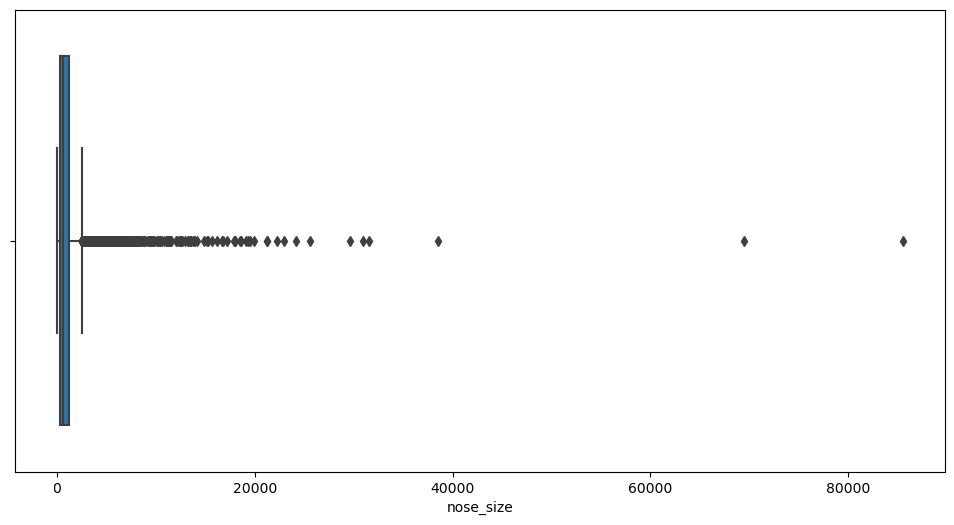

In [187]:
box_plot(man, 'man', 'nose_size')

#### 코 높이 통계량 - 남자

이상치 개수: 484
이상치 제거한 데이터의 평균값: 32.5
본래 데이터의 평균값: 35.284732142857145


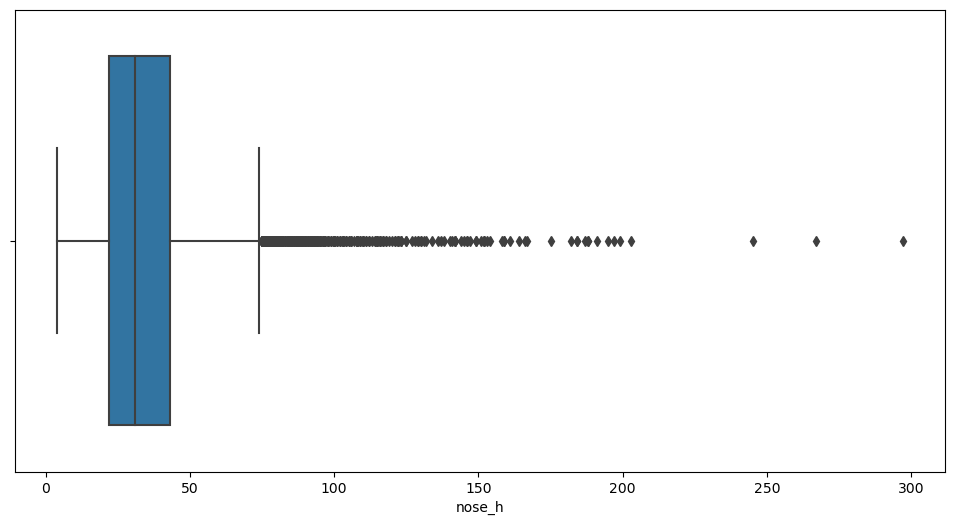

In [188]:
box_plot(man, 'man', 'nose_h')

### 목 통계량 - 남자

#### 목 높이 통계량 - 남자

이상치 개수: 448
이상치 제거한 데이터의 평균값: 47.564918154761905
본래 데이터의 평균값: 50.79607142857143


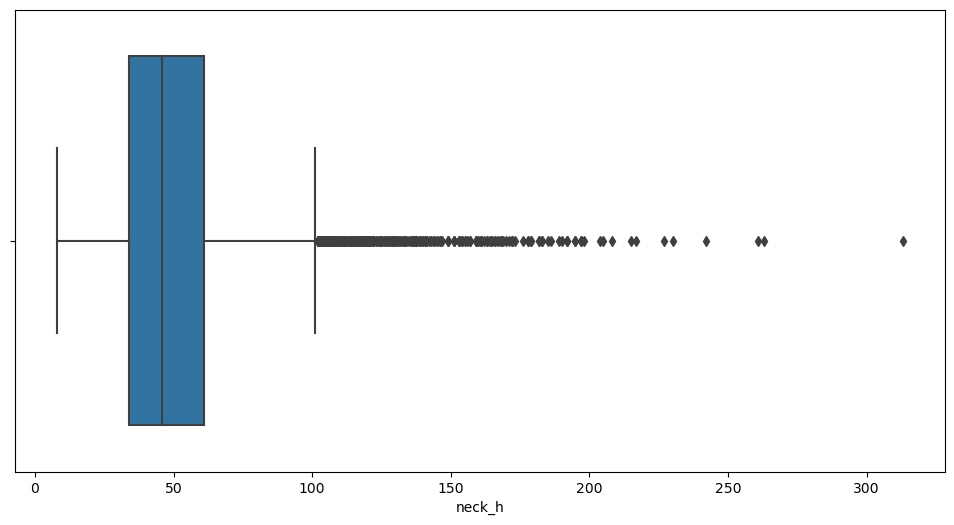

In [189]:
box_plot(man, 'man', 'neck_h')

#### 목 폭 통계량 - 남자

이상치 개수: 468
이상치 제거한 데이터의 평균값: 56.46095788296683
본래 데이터의 평균값: 60.70169642857143


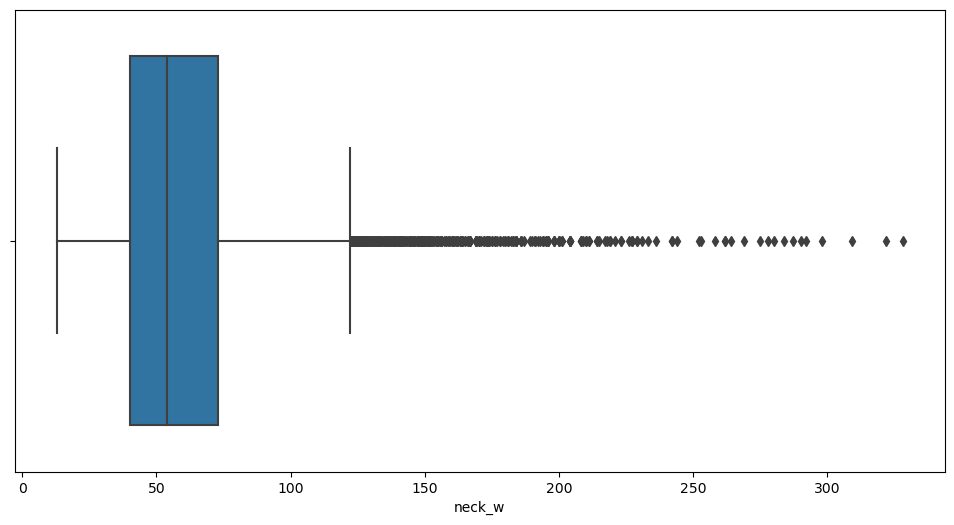

In [190]:
box_plot(man, 'man', 'neck_w')

#### 목 넓이 통계량 - 남자

이상치 개수: 770
이상치 제거한 데이터의 평균값: 2769.0974113135185
본래 데이터의 평균값: 3534.431875


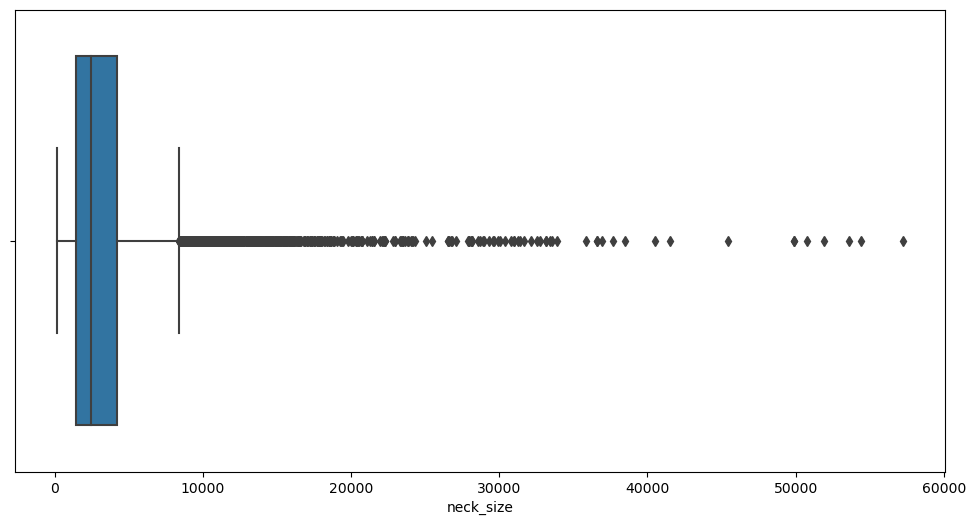

In [191]:
box_plot(man, 'man', 'neck_size')

### 몸 통계량 - 남자

#### 몸 높이 통계량 - 남자

이상치 개수: 0
이상치 제거한 데이터의 평균값: 811.64625
본래 데이터의 평균값: 811.64625


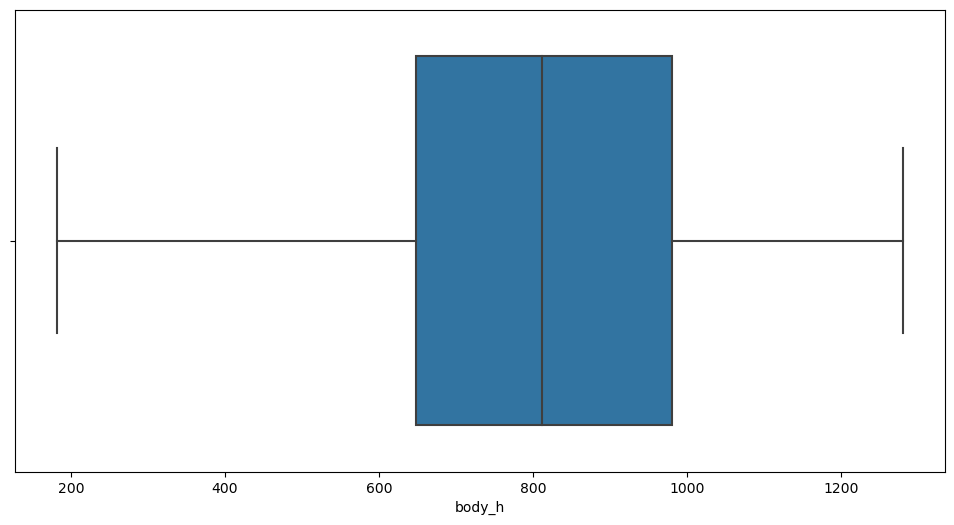

In [192]:
box_plot(man, 'man', 'body_h')

#### 몸 폭 통계량 - 남자

이상치 개수: 268
이상치 제거한 데이터의 평균값: 410.29061470911086
본래 데이터의 평균값: 422.78982142857143


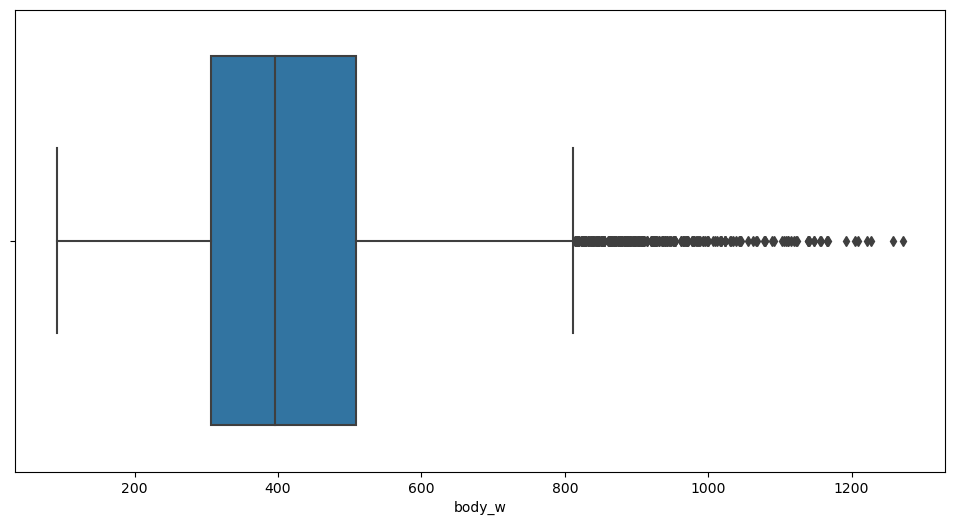

In [193]:
box_plot(man, 'man', 'body_w')

#### 몸 넓이 통계량 - 남자

이상치 개수: 305
이상치 제거한 데이터의 평균값: 347919.7804497476
본래 데이터의 평균값: 366930.4100892857


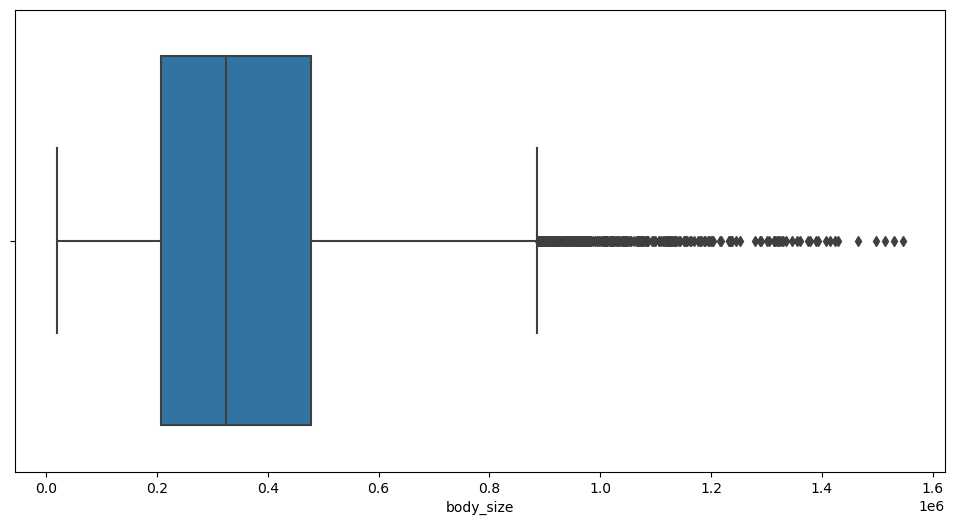

In [194]:
box_plot(man, 'man', 'body_size')

In [234]:
man.describe()

,body_h,body_w,head_h,head_w,face_h,face_w,eye_h,eye_w,nose_h,nose_w,...,shoes1_h,shoes_w,shoes2_h,shoes2_w,face_size,ear_size,eye_size,nose_size,body_size,neck_size
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,...,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,1.120000e+04,11200.000000
mean,811.646250,422.789821,261.301518,284.161518,158.742232,282.555714,35.380268,40.640179,35.284732,25.023482,...,90.714286,113.653036,86.512857,118.138304,51365.712857,2817.382143,1769.655714,1101.632768,3.669304e+05,3534.431875
std,217.638815,160.312030,97.096092,115.762681,66.403875,115.562692,20.264506,24.393264,19.996631,16.719034,...,38.600592,45.243899,37.745244,47.612076,46874.345568,3708.154083,2413.815362,1956.758536,2.154602e+05,3766.991911
min,182.000000,92.000000,38.000000,56.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,16.000000,24.000000,20.000000,2.000000,2.000000,100.000000,20.000000,20.000000,1.965600e+04,156.000000
25%,648.000000,307.000000,193.000000,203.000000,113.000000,202.000000,22.000000,23.000000,22.000000,14.000000,...,65.000000,84.000000,62.000000,86.000000,23097.750000,1184.000000,540.000000,340.000000,2.067442e+05,1449.750000
50%,812.000000,396.000000,244.000000,259.000000,145.000000,257.000000,31.000000,36.000000,31.000000,21.000000,...,83.000000,109.000000,79.000000,112.000000,37236.500000,1856.000000,1104.000000,651.000000,3.235860e+05,2475.000000
75%,980.000000,509.000000,312.000000,341.000000,189.000000,340.000000,44.000000,52.000000,43.000000,31.000000,...,106.000000,135.000000,100.000000,142.000000,63149.250000,3157.000000,2108.000000,1215.000000,4.788060e+05,4224.250000
max,1280.000000,1271.000000,962.000000,1032.000000,644.000000,1030.000000,308.000000,322.000000,297.000000,349.000000,...,478.000000,527.000000,534.000000,564.000000,653020.000000,94916.000000,72072.000000,85505.000000,1.545786e+06,57216.000000


-----------------------
## 여자 통계량

-----------------------

In [140]:
woman.describe()

,body_h,body_w,head_h,head_w,face_h,face_w,eye_h,eye_w,nose_h,nose_w,...,shoes1_h,shoes_w,shoes2_h,shoes2_w,face_size,ear_size,eye_size,nose_size,body_size,neck_size
count,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,...,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,11200.000000,1.120000e+04,11200.000000
mean,837.417589,454.058482,269.171250,278.259018,160.553393,277.153571,37.674911,42.806250,34.868661,24.571607,...,87.924821,108.631429,92.115268,105.577232,51292.932857,2540.128304,1978.726786,1104.312232,4.052327e+05,3672.381518
std,219.598746,169.991328,102.247251,116.672624,68.849919,116.231371,20.581673,25.049047,20.922769,17.302642,...,37.798199,43.313678,39.836798,42.062709,49193.767095,3161.125726,2489.855301,2142.030565,2.324360e+05,4027.513558
min,187.000000,110.000000,47.000000,60.000000,33.000000,60.000000,6.000000,4.000000,4.000000,3.000000,...,19.000000,19.000000,15.000000,24.000000,2170.000000,143.000000,36.000000,12.000000,2.057000e+04,120.000000
25%,675.000000,331.000000,198.000000,198.000000,113.000000,197.000000,23.000000,25.000000,21.000000,14.000000,...,63.000000,80.000000,66.000000,76.000000,22826.000000,1089.000000,612.000000,320.000000,2.335530e+05,1512.000000
50%,845.000000,426.000000,251.000000,253.000000,146.000000,252.000000,33.000000,38.000000,30.000000,21.000000,...,80.000000,104.000000,84.000000,100.000000,36616.000000,1715.500000,1254.000000,609.000000,3.590825e+05,2537.000000
75%,1011.000000,547.000000,319.000000,332.000000,192.000000,331.000000,47.000000,55.000000,43.000000,30.000000,...,103.000000,129.000000,109.000000,126.000000,62200.000000,2829.000000,2400.000000,1173.000000,5.292260e+05,4374.000000
max,1280.000000,1280.000000,941.000000,1124.000000,664.000000,1124.000000,214.000000,261.000000,286.000000,446.000000,...,470.000000,439.000000,476.000000,489.000000,689792.000000,70224.000000,49068.000000,90092.000000,1.638400e+06,93744.000000


### 눈 넓이 통계량 - 여자

이상치 개수: 834
이상치 제거한 데이터의 평균값: 1458.7306579201236
본래 데이터의 평균값: 1978.7267857142858


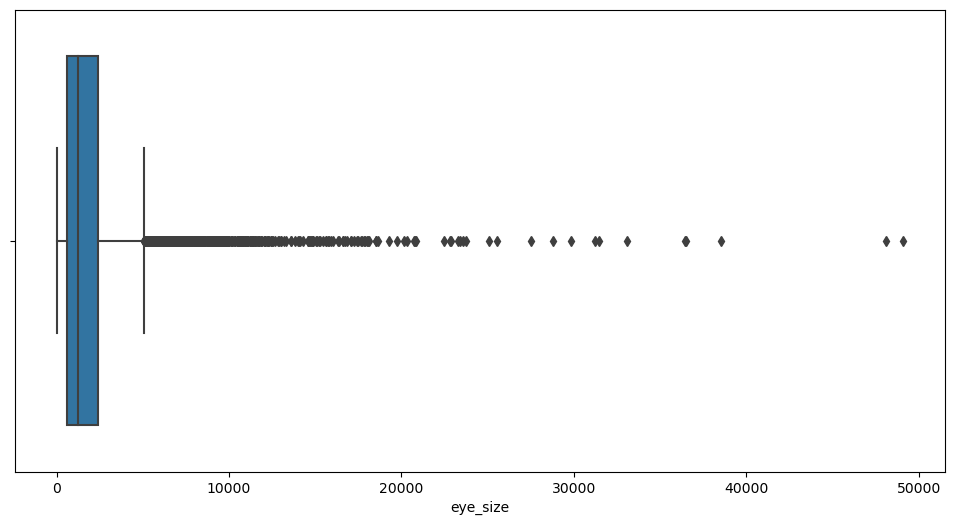

In [195]:
box_plot(woman, 'woman', 'eye_size')

### 얼굴넓이 통계량 - 여자

이상치 개수: 760
이상치 제거한 데이터의 평균값: 41234.73668582376
본래 데이터의 평균값: 51292.932857142856


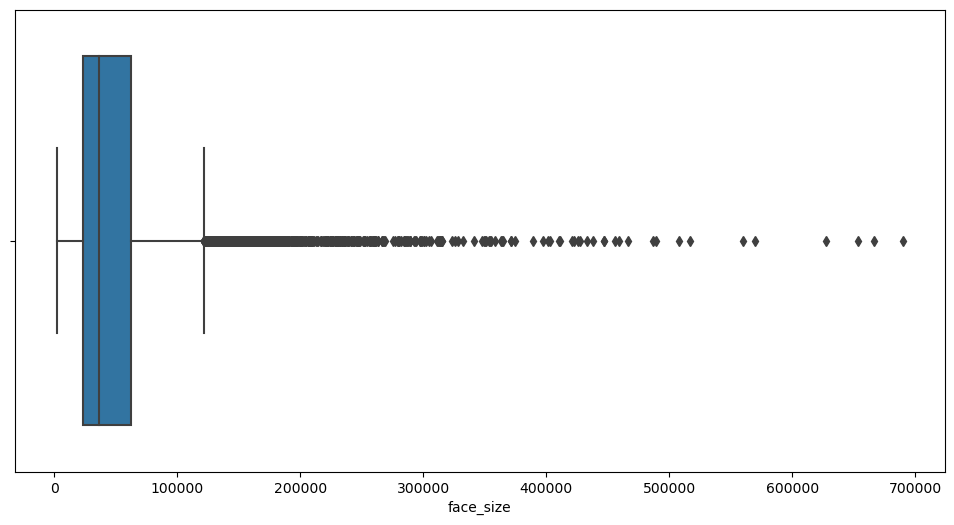

In [196]:
box_plot(woman, 'woman', 'face_size')

### 코 통계량 - 여자

#### 코 넓이 통계량 - 여자

이상치 개수: 944
이상치 제거한 데이터의 평균값: 706.8583268330733
본래 데이터의 평균값: 1104.312232142857


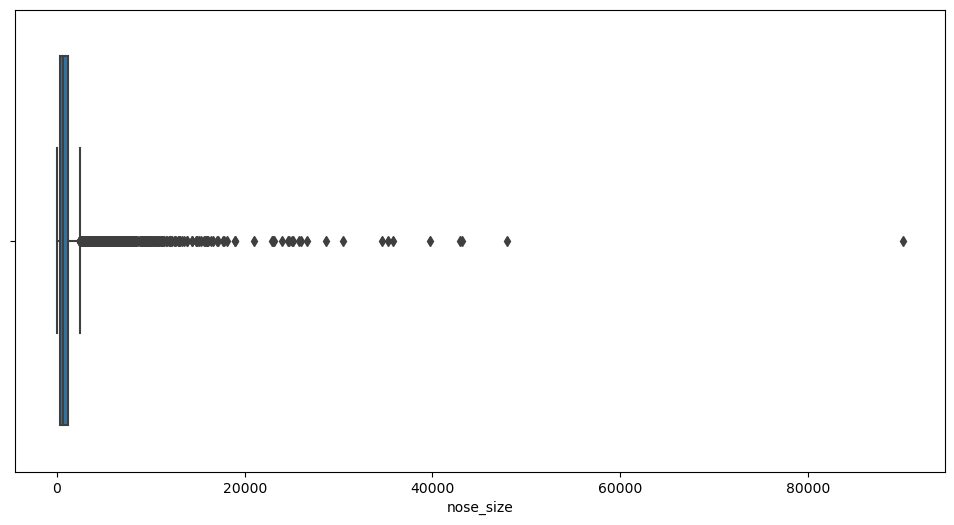

In [197]:
box_plot(woman, 'woman', 'nose_size')

#### 코 높이 통계량 - 여자

이상치 개수: 460
이상치 제거한 데이터의 평균값: 31.97951582867784
본래 데이터의 평균값: 34.86866071428572


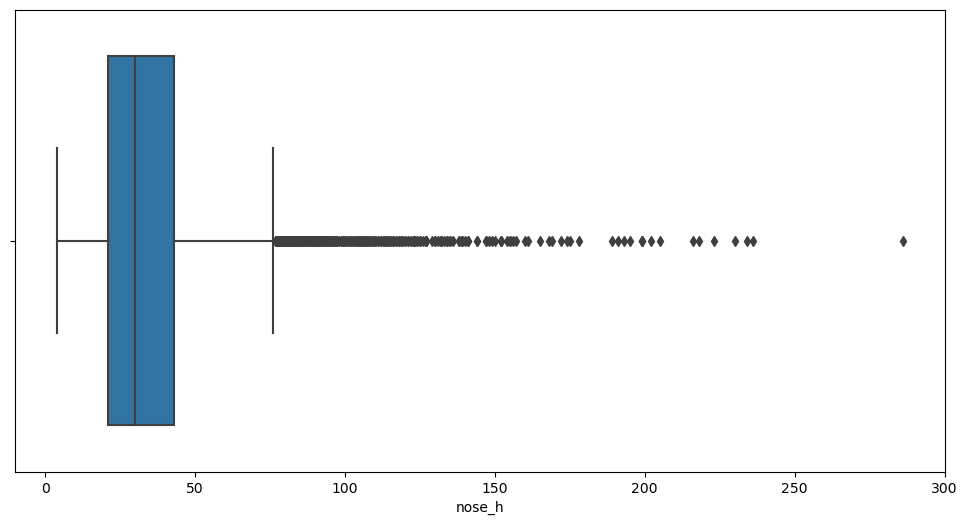

In [198]:
box_plot(woman, 'woman', 'nose_h')

### 목 통계량 - 여자

#### 목 높이 통계량 - 여자

이상치 개수: 450
이상치 제거한 데이터의 평균값: 49.41832558139535
본래 데이터의 평균값: 52.88357142857143


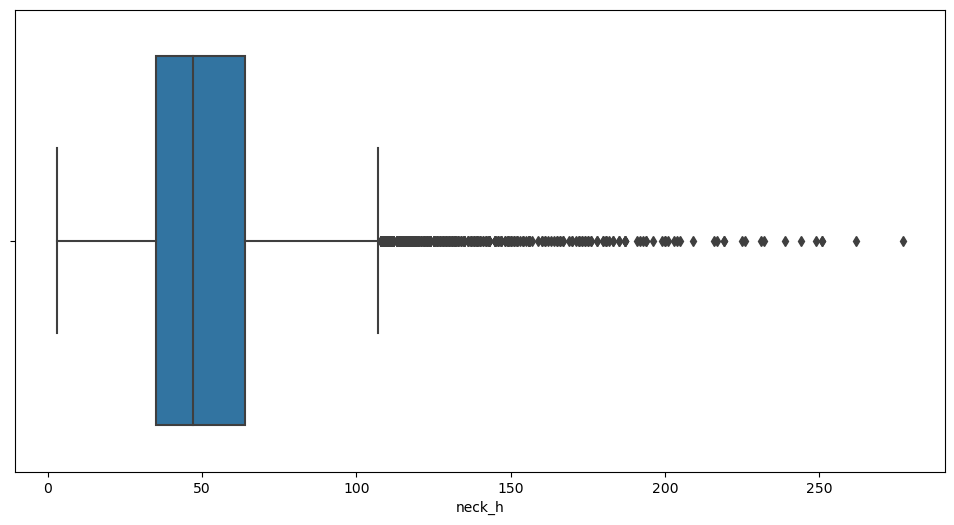

In [199]:
box_plot(woman, 'woman', 'neck_h')

#### 목 폭 통계량 - 여자

이상치 개수: 434
이상치 제거한 데이터의 평균값: 56.43247259892254
본래 데이터의 평균값: 60.430625


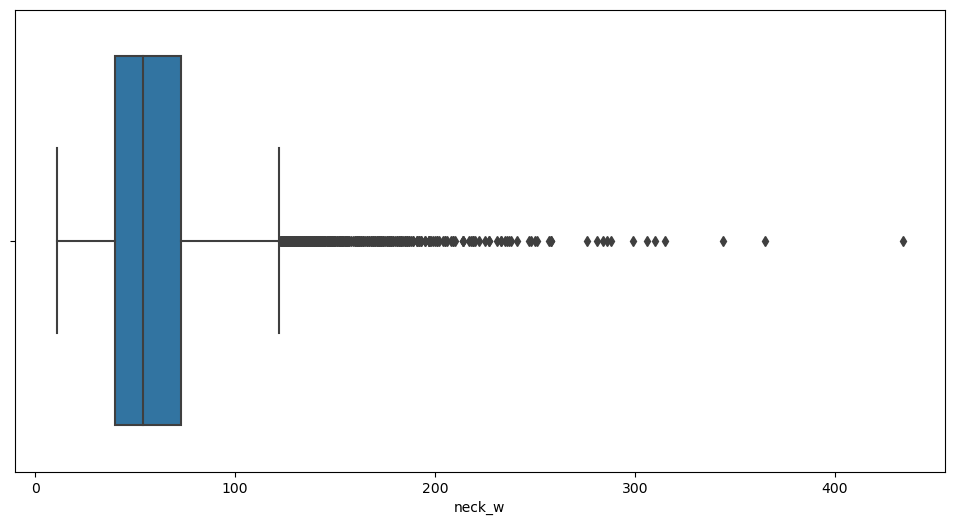

In [200]:
box_plot(woman, 'woman', 'neck_w')

#### 목 넓이 통계량 - 여자

이상치 개수: 788
이상치 제거한 데이터의 평균값: 2857.295236265847
본래 데이터의 평균값: 3672.381517857143


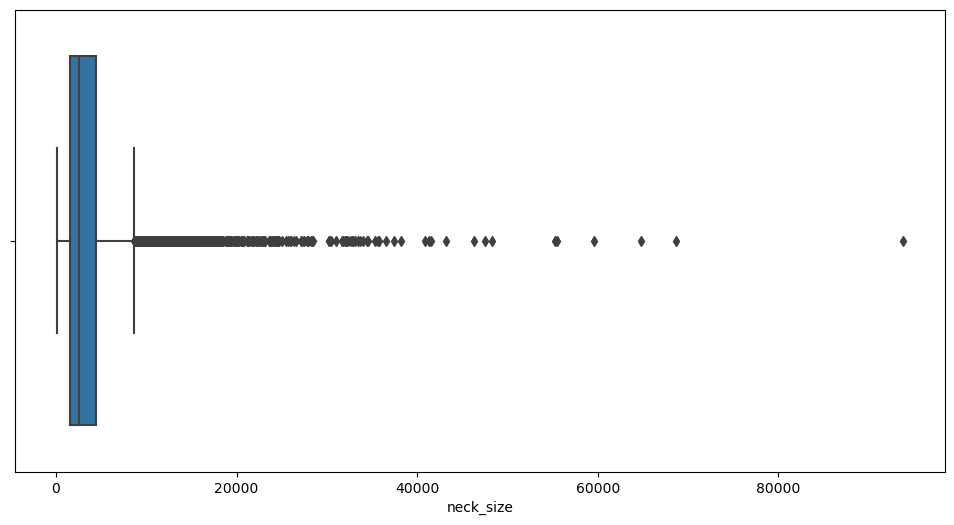

In [201]:
box_plot(woman, 'woman', 'neck_size')

### 몸 통계량 - 여자

#### 몸 높이 통계량 - 여자

이상치 개수: 0
이상치 제거한 데이터의 평균값: 837.4175892857143
본래 데이터의 평균값: 837.4175892857143


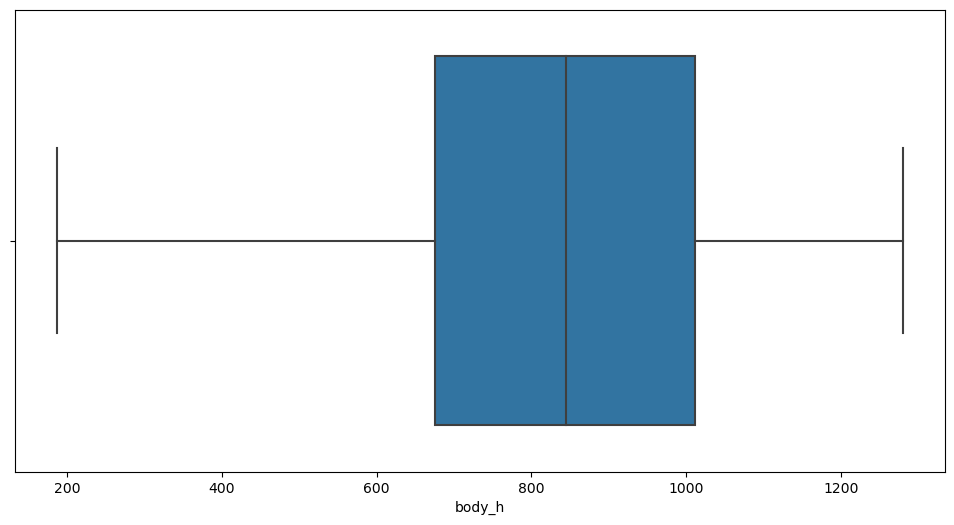

In [202]:
box_plot(woman, 'woman', 'body_h')

#### 몸 폭 통계량 - 여자

이상치 개수: 277
이상치 제거한 데이터의 평균값: 440.7131740364369
본래 데이터의 평균값: 454.05848214285714


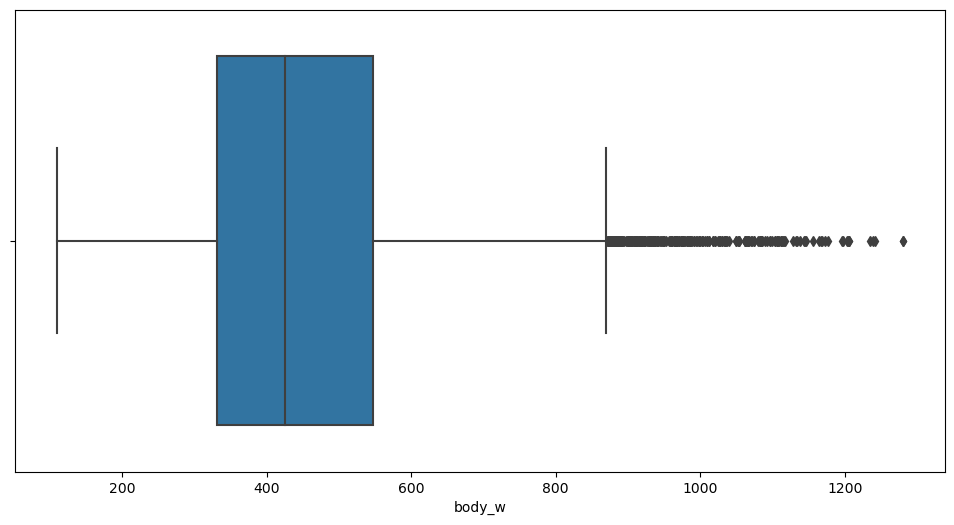

In [203]:
box_plot(woman, 'woman', 'body_w')

#### 몸 넓이 통계량 - 여자

이상치 개수: 293
이상치 제거한 데이터의 평균값: 385766.01338589896
본래 데이터의 평균값: 405232.68


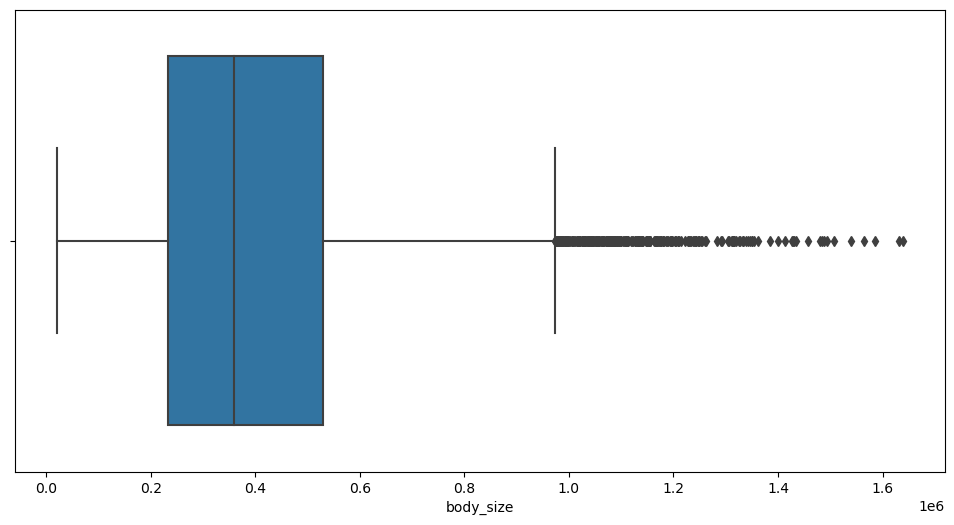

In [204]:
box_plot(woman, 'woman', 'body_size')

-----------------------
## 나무 통계량

-----------------------

In [151]:
tree['leaf_size'] = tree.leaf_h * tree.leaf_w
tree['branch_size'] = tree.branch_h * tree.branch_w
tree['trunk_size'] = tree.trunk_h * tree.trunk_w


### 잎 넓이 통계량

이상치 개수: 653
이상치 제거한 데이터의 평균값: 4072.66549729781
본래 데이터의 평균값: 4904.632589285714


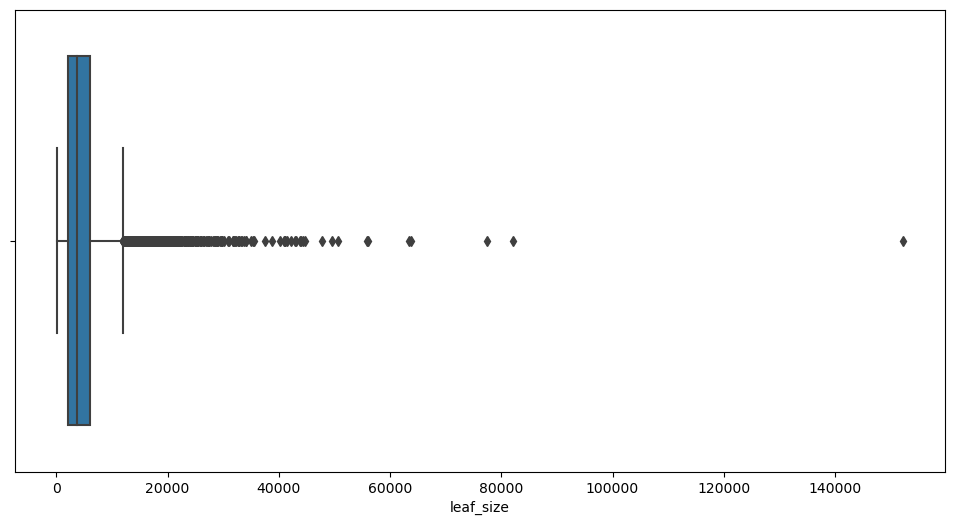

In [205]:
box_plot(tree, 'tree', 'leaf_size')

### 가지 넓이 통계량

이상치 개수: 626
이상치 제거한 데이터의 평균값: 72852.85918290146
본래 데이터의 평균값: 90219.60375


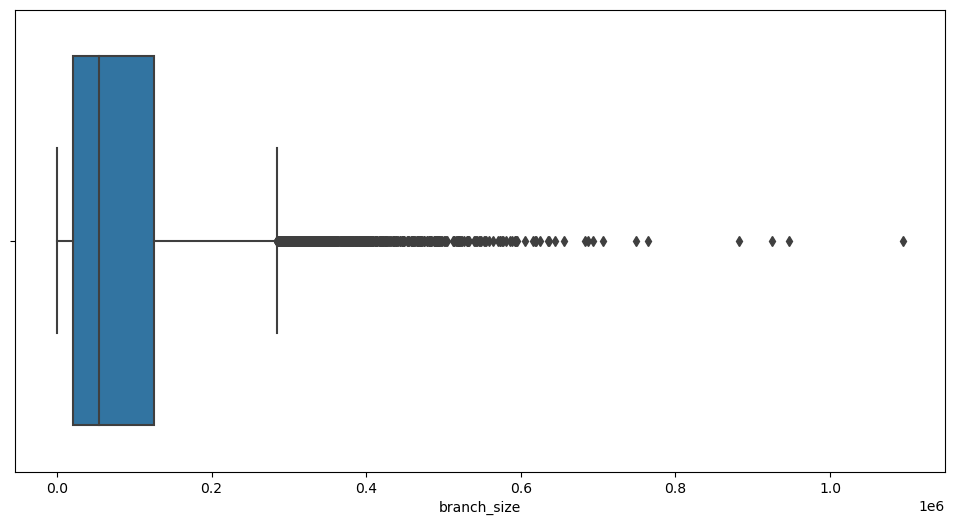

In [206]:
box_plot(tree, 'tree', 'branch_size')

### 줄기 넓이 통계량

이상치 개수: 273
이상치 제거한 데이터의 평균값: 151090.17836551662
본래 데이터의 평균값: 158605.20267857143


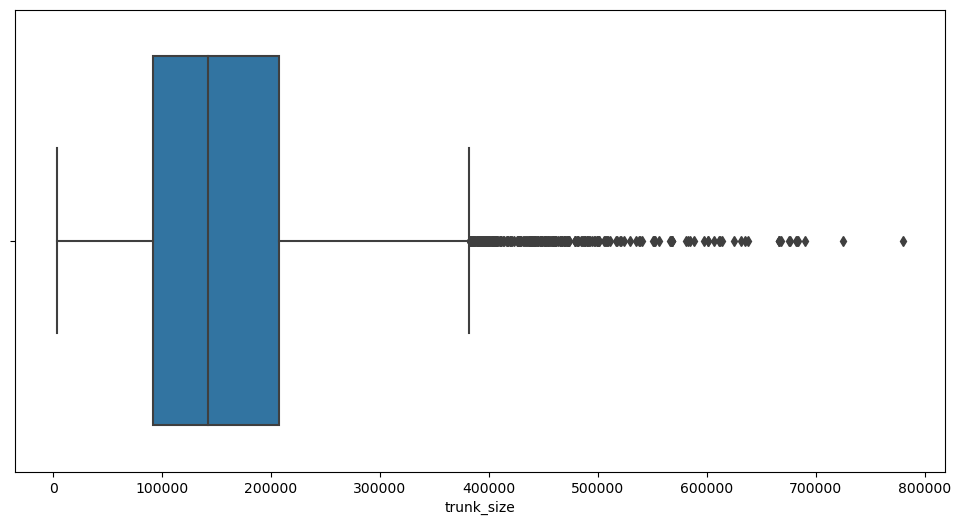

In [207]:
box_plot(tree, 'tree', 'trunk_size')

In [208]:
tree.head()

,tree_h,tree_w,trunk_h,trunk_w,branch_h,branch_w,leaf_h,leaf_w,crown_h,crown_w,leaf_size,branch_size,trunk_size
0,1206,931,527,394,383,633,105,75,640,925,7875,242439,207638
1,756,468,367,228,223,297,119,48,389,462,5712,66231,83676
2,1111,548,599,168,131,319,80,147,95,118,11760,41789,100632
3,864,410,415,271,48,160,117,113,71,55,13221,7680,112465
4,1261,922,834,556,51,75,69,37,307,319,2553,3825,463704


In [214]:
mean_key = list(mean.keys())
mean_val = list(mean.values())

In [215]:
mean_key

['roof_size',
 'door_size',
 'window_size',
 'eye_size_man',
 'face_size_man',
 'nose_size_man',
 'nose_h_man',
 'neck_h_man',
 'neck_w_man',
 'neck_size_man',
 'body_h_man',
 'body_w_man',
 'body_size_man',
 'eye_size_woman',
 'face_size_woman',
 'nose_size_woman',
 'nose_h_woman',
 'neck_h_woman',
 'neck_w_woman',
 'neck_size_woman',
 'body_h_woman',
 'body_w_woman',
 'body_size_woman',
 'leaf_size',
 'branch_size',
 'trunk_size']

In [235]:
## 남자 평균치
man_mean_key = mean_key[3:6]
man_mean_key.append(mean_key[9])
man_mean_key.append(mean_key[12])
man_mean_val = mean_val[3:6]
man_mean_val.append(mean_val[9])
man_mean_val.append(mean_val[12])

## 여자 평균치
woman_mean_key = mean_key[13:16]
woman_mean_key.append(mean_key[19])
woman_mean_key.append(mean_key[22])
woman_mean_val = mean_val[13:16]
woman_mean_val.append(mean_val[19])
woman_mean_val.append(mean_val[22])

## 나무 평균치
tree_mean_key = mean_key[-3:]
tree_mean_val = mean_val[-3:]

## 집 평균치
house_mean_key = mean_key[:3]
house_mean_val = mean_val[:3]

### man size 평균값 비교

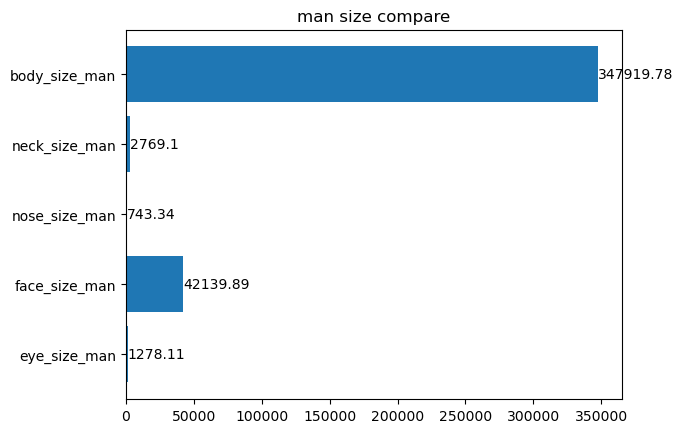

In [232]:
plt.barh(man_mean_key, man_mean_val)

plt.title("man size compare")

for i, value in enumerate(man_mean_val):
    val = round(value, 2)
    plt.text(value, i, str(val), va='center', ha='left')
    
plt.show()

### woman size 평균값 비교

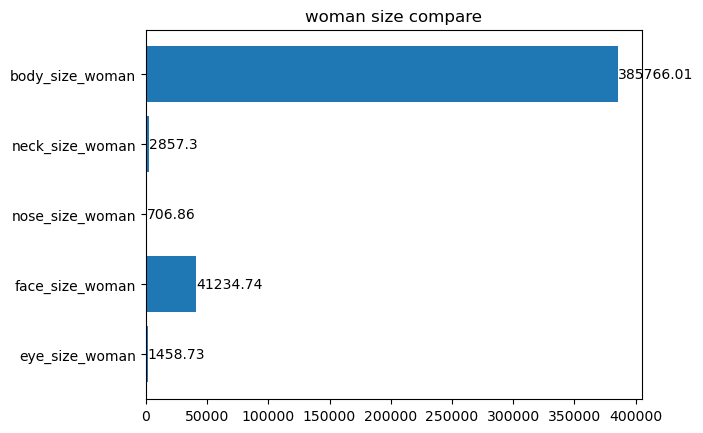

In [233]:
plt.barh(woman_mean_key, woman_mean_val)

plt.title("woman size compare")

for i, value in enumerate(woman_mean_val):
    val = round(value, 2)
    plt.text(value, i, str(val), va='center', ha='left')
    
plt.show()

### tree size 평균값 비교

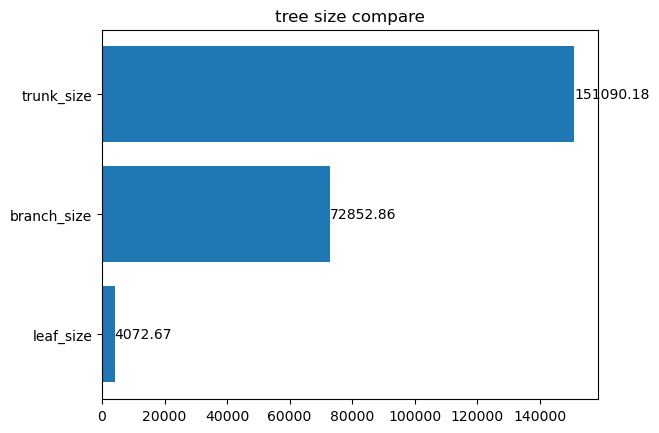

In [236]:
plt.barh(tree_mean_key, tree_mean_val)

plt.title("tree size compare")

for i, value in enumerate(tree_mean_val):
    val = round(value, 2)
    plt.text(value, i, str(val), va='center', ha='left')
    
plt.show()

### house size 평균값 비교

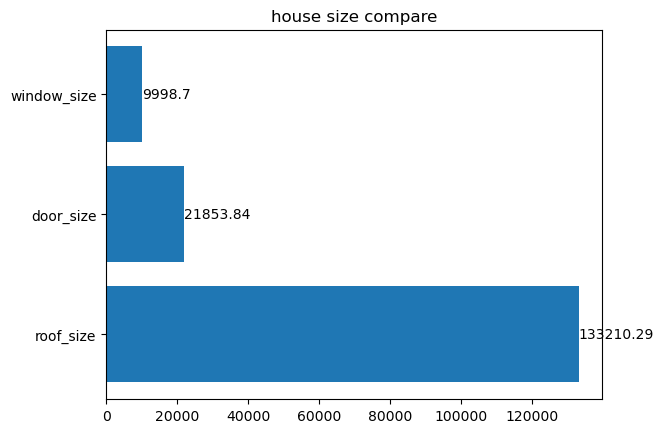

In [237]:
plt.barh(house_mean_key, house_mean_val)

plt.title("house size compare")

for i, value in enumerate(house_mean_val):
    val = round(value, 2)
    plt.text(value, i, str(val), va='center', ha='left')
    
plt.show()